# 결정트리 과적합 (Overfitting)

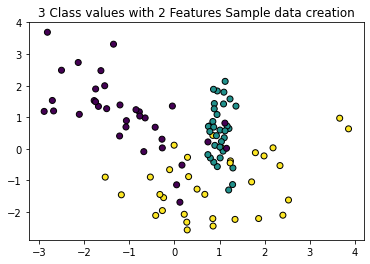

In [66]:
# make_classification 분류를 위한 테스트용 데이터 만들기

from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

#2차원 시각화를 위해 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성.
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                           n_classes=3, n_clusters_per_class=1, random_state=0)

#그래프 형태로 2개의 피처로 2차원 좌표 시각화
plt.scatter(X_features[:,0], X_features[:,1], marker='o', c=y_labels, edgecolor='k');

## model 1
Hyperparameters = defalt

visualize_boundary() : 결정트리 모델이 어떤 결정 기준을 가지고 분할하면서 데이터를 분류하는지 확인

In [70]:
from sklearn.tree import DecisionTreeClassifier

#특정한 트리 생성 제약 없는 결정트리의 학습과 결정 경계 시각화.
dt_clt = DecisionTreeClassifier().fit(X_features, y_labels)

In [71]:
from matplotlib.colors import ListedColormap
import numpy as np


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # 마커와 컬러맵 설정
    markers = ('s','v','o')
    colors = ('#f6e58d','#fab1a0','#dff9fb','#badc58','#dfe6e9')
    cmap = ListedColormap(colors[:len(np.unique(y))])
   

    # 결정 경계 그리기
    x1_min, x1_max = X[:,0].min() - 1, X[:, 0].max() +1
    x2_min, x2_max = X[:,1].min() -1, X[:, 1].max() +1 
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                                   np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)

    # numpy.meshgrid로 배열 xx1, xx2 쌍을 만들고 그리드 배열을 펼치고 훈련 데이터와 같은 개수의 열이 되도록 행렬을 만든것임
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpah=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # 만들어놓은 좌표 위에 샘플의 산점도를 그리기
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl,1], alpha =1,                         
                    c=colors[idx],marker=markers[idx],label=cl,edgecolor='black')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: The following kwargs were not used by contour: 'alpah'


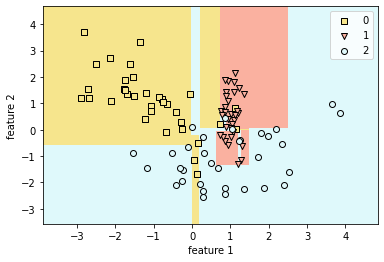

In [75]:
# 만든 함수 실행
plot_decision_regions(X_features, y_labels, classifier=dt_clt)
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend(loc='upper right')
plt.show()

- 일부 이상치 데이터까지 분류하기 위해 분할이 자주 일어나 결정 기준 경계가 매우 많아졌다. 
- 결정트리의 기본(defalt) 하이퍼 파라미터 설정은 leaf node 안에 데이터가 모두 균일하거나 하나만 존재(min_samples_leaf=1) 해야 하는 엄격한 분할 기준으로 인해 결정 기준 경계가 많아지고 복잡해졌다.
- 이렇게 복잡한 모델은 학습 데이터 세트의 특성과 약간만 다른 형태의 데이터 세트를 예측하면 예측 정확도가 떨어지게 된다. 이런 현상을 학습 데이터 세트에 과적합된 예측 모델 이라고 한다.

## model 2
hyperparameter = min_samples_leaf 6
: 6개 이하의 데이터는 leaf node를 생성할 수 있도록 리프노드 생성 규칙 완화

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: The following kwargs were not used by contour: 'alpah'


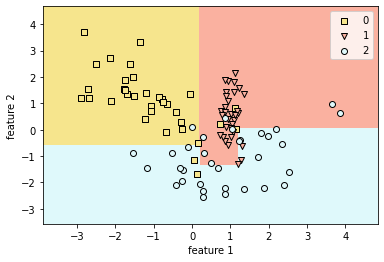

In [77]:
dt_clt = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_labels)
# 만든 함수 실행
plot_decision_regions(X_features, y_labels, classifier=dt_clt)
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend(loc='upper right')
plt.show()

- 이상치에 크게 반응하지 않으면서 좀 더 일반화된 분류 규칙에 따라 분류됨.
- 하이퍼파라미터 값이 defalt인 모델보다 예측 성능이 더 뛰어날 가능성이 높다.
- 테스트 데이터 세트는 학습 데이터 세트와 다르기 때문에 학습 데이터에 지나치게 최적화된 분류기준은 오히려 테스트 데이터 세트에서 정확도를 떨어뜨릴 수 있다.